In [1]:
from pathlib import Path

from communiquer.launchers import CellChatLauncher, CellPhoneDBLauncher
from communiquer.drawing import draw_chord_diagram

Provide paths to the data. You have to prepare 2 files. The first one, **counts**, contains normalized (but not scaled!) counts matrix (rows are genes, columns are barcodes). The second file contains **meta information** about cells. It must have 2 columns: the first one with cell IDs (e.g. barcodes), and the second with cells labels (e.g. cell types)

In [2]:
counts_path = Path("data/pbmc3k_counts.tsv")
meta_path = Path("data/pbmc3k_meta.txt")

cpdb_output_path = Path("data/cpdb_output")

In [3]:
!head data/pbmc3k_meta.txt

Cell	cell_type
AAACATACAACCAC-1	RPS expressing
AAACATTGAGCTAC-1	B
AAACATTGATCAGC-1	CD4 T
AAACCGTGCTTCCG-1	CD14 Monocytes
AAACCGTGTATGCG-1	NK
AAACGCACTGGTAC-1	CD4 T
AAACGCTGACCAGT-1	CD8 T
AAACGCTGGTTCTT-1	CD8 T
AAACGCTGTAGCCA-1	CD8 T


# Running CellPhoneDB

In [4]:
cpdb_launcher = CellPhoneDBLauncher(
    meta_file_path=meta_path,
    counts_file_path=counts_path,
    output_path=cpdb_output_path,  # CellPhoneDB saves its output to the files
    project_name="pbmc3k",
    counts_data="gene_name"
)

In [5]:
cpdb_launcher.run()

Running command cellphonedb method statistical_analysis --counts-data=gene_name --project-name=pbmc3k --threshold=0.1 --result-precision=3 --output-path=data/cpdb_output --output-format=txt --means-result-name=means --significant-means-result-name=significant_means --deconvoluted-result-name=deconvoluted --debug-seed=-1 --pvalue=0.05 --pvalues-result-name=pvalues --iterations=1000 --threads=-1 --verbose data/pbmc3k_meta.txt data/pbmc3k_counts.tsv
[ ][APP][29/08/21-23:48:04][WARNING] Latest local available version is `v2.0.0`, using it
[ ][APP][29/08/21-23:48:04][WARNING] User selected downloaded database `v2.0.0` is available, using it
[ ][CORE][29/08/21-23:48:04][INFO] Initializing SqlAlchemy CellPhoneDB Core
[ ][CORE][29/08/21-23:48:04][INFO] Using custom database at /home/vladimir/.cpdb/releases/v2.0.0/cellphone.db
[ ][APP][29/08/21-23:48:04][INFO] Launching Method cpdb_statistical_analysis_local_method_launcher
[ ][APP][29/08/21-23:48:04][INFO] Launching Method _set_paths
[ ][APP][

/home/vladimir/PycharmProjects/communiquer/communiquer/command_line.py:203: UserWarning: /home/vladimir/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/vladimir/.local/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (4.0.0) doesn't match a supported version!
  RequestsDependencyWarning)

  warnings.warn(command_line_subprocess.stderr.decode())


Read the output and display it

In [6]:
cpdb_launcher.read_output(convert_to_cellchat_format=True)

In [7]:
cpdb_launcher.pvalues_df

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,...,NK|RPS expressing,RPS expressing|B,RPS expressing|CD14 Monocytes,RPS expressing|CD4 T,RPS expressing|CD8 T,RPS expressing|Dendritic,RPS expressing|FCGR3A Monocytes,RPS expressing|Megakaryocytes,RPS expressing|NK,RPS expressing|RPS expressing
0,CPI-SC0200AC9E3,THBS1_a2Bb3 complex,simple:P07996,complex:a2Bb3 complex,THBS1,NaN,False,False,False,curated,...,1.000,1.0,1.0,1.0,1.0,1.000,1.0,1.000,1.0,1.0
1,CPI-SS0F9D53834,JAM3_JAM3,simple:Q9BX67,simple:Q9BX67,JAM3,JAM3,True,False,False,curated,...,1.000,1.0,1.0,1.0,1.0,1.000,1.0,1.000,1.0,1.0
2,CPI-SS016EE0084,PDCD1_CD274,simple:Q15116,simple:Q9NZQ7,PDCD1,CD274,False,True,True,curated,...,1.000,1.0,1.0,1.0,1.0,1.000,1.0,1.000,1.0,1.0
3,CPI-SS0DA033F03,TNFRSF1A_GRN,simple:P19438,simple:P28799,TNFRSF1A,GRN,True,True,False,"IMEx,InnateDB-All,MINT",...,1.000,1.0,1.0,1.0,1.0,1.000,1.0,1.000,1.0,1.0
4,CPI-SS0C4E86714,TNFRSF1B_GRN,simple:P20333,simple:P28799,TNFRSF1B,GRN,True,True,False,"IMEx,InnateDB-All,MINT",...,1.000,1.0,1.0,1.0,1.0,1.000,1.0,1.000,1.0,1.0
5,CPI-SS05D23BCE8,HLA-DPB1_TNFSF13B,simple:HLADPB1,simple:Q9Y275,HLA-DPB1,TNFSF13B,True,True,False,InnateDB-All,...,1.000,1.0,1.0,1.0,1.0,0.996,1.0,1.000,1.0,1.0
6,CPI-SS0E2863F09,TNFRSF17_TNFSF13B,simple:Q02223,simple:Q9Y275,TNFRSF17,TNFSF13B,True,True,False,curated,...,1.000,1.0,1.0,1.0,1.0,1.000,1.0,1.000,1.0,1.0
7,CPI-SS09648FAA9,TNFRSF13C_TNFSF13B,simple:Q96RJ3,simple:Q9Y275,TNFRSF13C,TNFSF13B,True,True,False,guidetopharmacology.org,...,1.000,1.0,1.0,1.0,1.0,1.000,1.0,1.000,1.0,1.0
8,CPI-SS0E4B1484B,ICOSLG_ICOS,simple:O75144,simple:Q9Y6W8,ICOSLG,ICOS,True,False,True,curated,...,1.000,1.0,1.0,1.0,1.0,1.000,1.0,1.000,1.0,1.0
9,CPI-SS040630206,CXCL2_CXCR1,simple:P19875,simple:P25024,CXCL2,CXCR1,True,False,True,I2D,...,1.000,1.0,1.0,1.0,1.0,1.000,1.0,1.000,1.0,1.0


In [8]:
cpdb_launcher.means_df.head()

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,...,NK|RPS expressing,RPS expressing|B,RPS expressing|CD14 Monocytes,RPS expressing|CD4 T,RPS expressing|CD8 T,RPS expressing|Dendritic,RPS expressing|FCGR3A Monocytes,RPS expressing|Megakaryocytes,RPS expressing|NK,RPS expressing|RPS expressing
0,CPI-SC0200AC9E3,THBS1_a2Bb3 complex,simple:P07996,complex:a2Bb3 complex,THBS1,NaN,False,False,False,curated,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.459,0.000,0.000
1,CPI-SS0F9D53834,JAM3_JAM3,simple:Q9BX67,simple:Q9BX67,JAM3,JAM3,True,False,False,curated,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,CPI-SS016EE0084,PDCD1_CD274,simple:Q15116,simple:Q9NZQ7,PDCD1,CD274,False,True,True,curated,...,0.000,0.006,0.005,0.005,0.005,0.000,0.000,0.000,0.000,0.004
3,CPI-SS0DA033F03,TNFRSF1A_GRN,simple:P19438,simple:P28799,TNFRSF1A,GRN,True,True,False,"IMEx,InnateDB-All,MINT",...,0.197,0.134,0.882,0.080,0.089,0.932,0.487,0.187,0.107,0.092
4,CPI-SS0C4E86714,TNFRSF1B_GRN,simple:P20333,simple:P28799,TNFRSF1B,GRN,True,True,False,"IMEx,InnateDB-All,MINT",...,0.206,0.143,0.891,0.089,0.098,0.941,0.496,0.197,0.116,0.101


In [9]:
cpdb_launcher.count_significant_interactions()

In [10]:
cpdb_launcher.counts_df

,RPS expressing,B,CD4 T,CD14 Monocytes,NK,CD8 T,FCGR3A Monocytes,Dendritic,Megakaryocytes
RPS expressing,1,0,1,1,1,1,1,1,0
B,1,0,1,2,1,1,2,2,0
CD4 T,0,0,1,1,1,1,1,1,0
CD14 Monocytes,0,0,0,3,0,0,3,3,0
NK,1,0,1,3,1,1,3,3,0
CD8 T,0,0,0,1,0,0,1,1,0
FCGR3A Monocytes,0,1,0,3,0,0,3,3,0
Dendritic,0,0,0,3,0,0,4,3,0
Megakaryocytes,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

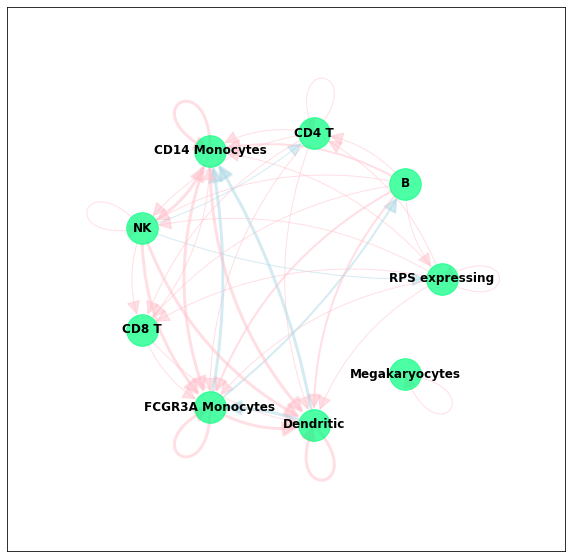

In [11]:
cpdb_launcher.visualise_interactions()

<AxesSubplot:title={'center':'Interactions counts'}>

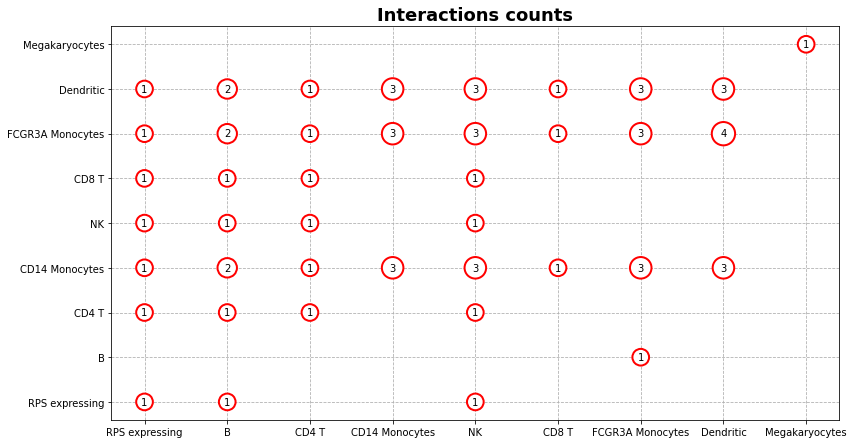

In [12]:
cpdb_launcher.dotplot_counts()

# Running CellChat 

In [13]:
cellchat_launcher = CellChatLauncher(counts_file_path=counts_path, meta_file_path=meta_path)

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: igraph

R[write to console]: 
Attaching package: ‘igraph’


R[write to console]: The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


R[write to console]: The following objects are masked from ‘package:stats’:

    decompose, spectrum


R[write to console]: The following object is masked from ‘package:base’:

    union


R[write to console]: Loading required package: ggplot2

R[write to console]: Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



In [14]:
cellchat_launcher.run()

R[write to console]: Create a CellChat object from a data matrix

R[write to console]: Set cell identities for the new CellChat object



The cell groups used for CellChat analysis are  B CD14 Monocytes CD4 T CD8 T Dendritic FCGR3A Monocytes Megakaryocytes NK RPS expressing 
  |                                                  | 0 % ~calculating   |+++                                               | 4 % ~00s           |+++++                                             | 8 % ~00s           |+++++++                                           | 12% ~00s           |+++++++++                                         | 17% ~00s           |+++++++++++                                       | 21% ~00s           |+++++++++++++                                     | 25% ~00s           |+++++++++++++++                                   | 29% ~00s           |+++++++++++++++++                                 | 33% ~00s           |+++++++++++++++++++                               | 38% ~00s           |+++++++++++++++++++++                             | 42% ~00s           |+++++++++++++++++++++++                           | 46% ~00s       

  |                                                  | 0 % ~calculating   |++                                                | 4 % ~00s           |++++                                              | 7 % ~00s           |++++++                                            | 11% ~00s           |++++++++                                          | 14% ~00s           |+++++++++                                         | 18% ~00s           |+++++++++++                                       | 21% ~00s           |+++++++++++++                                     | 25% ~00s           |+++++++++++++++                                   | 29% ~00s           |+++++++++++++++++                                 | 32% ~00s           |++++++++++++++++++                                | 36% ~00s           |++++++++++++++++++++                              | 39% ~00s           |++++++++++++++++++++++                            | 43% ~00s           |++++++++++++++++++++++++                          | 46% ~00s 

  |                                                  | 0 % ~calculating   |++++                                              | 7 % ~00s           |++++++++                                          | 14% ~00s           |+++++++++++                                       | 21% ~00s           |+++++++++++++++                                   | 29% ~00s           |++++++++++++++++++                                | 36% ~00s           |++++++++++++++++++++++                            | 43% ~00s           |+++++++++++++++++++++++++                         | 50% ~00s           |+++++++++++++++++++++++++++++                     | 57% ~00s           |+++++++++++++++++++++++++++++++++                 | 64% ~00s           |++++++++++++++++++++++++++++++++++++              | 71% ~00s           |++++++++++++++++++++++++++++++++++++++++          | 79% ~00s           |+++++++++++++++++++++++++++++++++++++++++++       | 86% ~00s           |+++++++++++++++++++++++++++++++++++++++++++++++   | 93% ~00s 

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~01s           |++                                                | 2 % ~01s           |++                                                | 3 % ~01s           |+++                                               | 4 % ~01s           |+++                                               | 5 % ~01s           |++++                                              | 6 % ~01s           |++++                                              | 7 % ~01s           |+++++                                             | 8 % ~01s           |+++++                                             | 9 % ~01s           |++++++                                            | 10% ~00s           |++++++                                            | 11% ~00s           |+++++++                                           | 12% ~00s           |+++++++                                           | 13% ~00s 

  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |=====                                                                 |   7%
  |                                                                            
  |=========                                                             |  13%
  |                                                                            
  |==============                                                        |  20%
  |                                                                            
  |===================                                                   |  27%
  |                                                                            
  |=======================                                               |  33%
  |                                     

In [15]:
cellchat_launcher.read_output()

In [16]:
cellchat_launcher.weights_df

,B,CD14 Monocytes,CD4 T,CD8 T,Dendritic,FCGR3A Monocytes,Megakaryocytes,NK,RPS expressing
B,0.0,0.0,0.0,0.0,0.013831,0.018676,0.000000,0.0,0.0
CD14 Monocytes,0.0,0.0,0.0,0.0,0.000000,0.004972,0.000000,0.0,0.0
CD4 T,0.0,0.0,0.0,0.0,0.012438,0.016804,0.000000,0.0,0.0
CD8 T,0.0,0.0,0.0,0.0,0.000000,0.005722,0.000000,0.0,0.0
Dendritic,0.0,0.0,0.0,0.0,0.010088,0.013641,0.000000,0.0,0.0
FCGR3A Monocytes,0.0,0.0,0.0,0.0,0.000000,0.003751,0.000000,0.0,0.0
Megakaryocytes,0.0,0.0,0.0,0.0,0.000000,0.000000,0.015651,0.0,0.0
NK,0.0,0.0,0.0,0.0,0.014414,0.019459,0.000000,0.0,0.0
RPS expressing,0.0,0.0,0.0,0.0,0.013504,0.018237,0.000000,0.0,0.0


CellChat has a different output format. Instead of one big table it has a separate table for each interation

In [17]:
cellchat_launcher.weights_df

,B,CD14 Monocytes,CD4 T,CD8 T,Dendritic,FCGR3A Monocytes,Megakaryocytes,NK,RPS expressing
B,0.0,0.0,0.0,0.0,0.013831,0.018676,0.000000,0.0,0.0
CD14 Monocytes,0.0,0.0,0.0,0.0,0.000000,0.004972,0.000000,0.0,0.0
CD4 T,0.0,0.0,0.0,0.0,0.012438,0.016804,0.000000,0.0,0.0
CD8 T,0.0,0.0,0.0,0.0,0.000000,0.005722,0.000000,0.0,0.0
Dendritic,0.0,0.0,0.0,0.0,0.010088,0.013641,0.000000,0.0,0.0
FCGR3A Monocytes,0.0,0.0,0.0,0.0,0.000000,0.003751,0.000000,0.0,0.0
Megakaryocytes,0.0,0.0,0.0,0.0,0.000000,0.000000,0.015651,0.0,0.0
NK,0.0,0.0,0.0,0.0,0.014414,0.019459,0.000000,0.0,0.0
RPS expressing,0.0,0.0,0.0,0.0,0.013504,0.018237,0.000000,0.0,0.0


In [18]:
cellchat_launcher.pvalues_dfs

{'CXCL2_CXCR1':                     B  CD14 Monocytes  CD4 T  CD8 T  Dendritic  \
 B                 1.0             1.0    1.0    1.0        1.0   
 CD14 Monocytes    1.0             1.0    1.0    1.0        1.0   
 CD4 T             1.0             1.0    1.0    1.0        1.0   
 CD8 T             1.0             1.0    1.0    1.0        1.0   
 Dendritic         1.0             1.0    1.0    1.0        1.0   
 FCGR3A Monocytes  1.0             1.0    1.0    1.0        1.0   
 Megakaryocytes    1.0             1.0    1.0    1.0        1.0   
 NK                1.0             1.0    1.0    1.0        1.0   
 RPS expressing    1.0             1.0    1.0    1.0        1.0   
 
                   FCGR3A Monocytes  Megakaryocytes   NK  RPS expressing  
 B                              1.0             1.0  1.0             1.0  
 CD14 Monocytes                 1.0             1.0  1.0             1.0  
 CD4 T                          1.0             1.0  1.0             1.0  
 CD8 T       

In [19]:
cellchat_launcher.probabilities_dfs

{'CXCL2_CXCR1':                     B  CD14 Monocytes  CD4 T  CD8 T  Dendritic  \
 B                 0.0             0.0    0.0    0.0        0.0   
 CD14 Monocytes    0.0             0.0    0.0    0.0        0.0   
 CD4 T             0.0             0.0    0.0    0.0        0.0   
 CD8 T             0.0             0.0    0.0    0.0        0.0   
 Dendritic         0.0             0.0    0.0    0.0        0.0   
 FCGR3A Monocytes  0.0             0.0    0.0    0.0        0.0   
 Megakaryocytes    0.0             0.0    0.0    0.0        0.0   
 NK                0.0             0.0    0.0    0.0        0.0   
 RPS expressing    0.0             0.0    0.0    0.0        0.0   
 
                   FCGR3A Monocytes  Megakaryocytes   NK  RPS expressing  
 B                              0.0             0.0  0.0             0.0  
 CD14 Monocytes                 0.0             0.0  0.0             0.0  
 CD4 T                          0.0             0.0  0.0             0.0  
 CD8 T       

Let's take a look at one of the tables

In [20]:
cellchat_launcher.pvalues_dfs["ESAM_ESAM"]

,B,CD14 Monocytes,CD4 T,CD8 T,Dendritic,FCGR3A Monocytes,Megakaryocytes,NK,RPS expressing
B,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0
CD14 Monocytes,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0
CD4 T,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0
CD8 T,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0
Dendritic,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0
FCGR3A Monocytes,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0
Megakaryocytes,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0
NK,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0
RPS expressing,1.0,1.0,1.0,1.0,0.01,1.0,1.0,1.0,1.0


This format is somehow useful, e.g. when we want to build a chord diagram. That's why we set `convert_to_cellchat_format=True` when running `read_output()` for CellPhoneDB launcher. So you can also get a matrix for every interactions for CellPhoneDB:

In [22]:
cpdb_launcher.pvalues_dfs["ESAM_ESAM"]

,RPS expressing,B,CD4 T,CD14 Monocytes,NK,CD8 T,FCGR3A Monocytes,Dendritic,Megakaryocytes
RPS expressing,1,1,1,1,1,1,1,1,1
B,1,1,1,1,1,1,1,1,1
CD4 T,1,1,1,1,1,1,1,1,1
CD14 Monocytes,1,1,1,1,1,1,1,1,1
NK,1,1,1,1,1,1,1,1,1
CD8 T,1,1,1,1,1,1,1,1,1
FCGR3A Monocytes,1,1,1,1,1,1,1,1,1
Dendritic,1,1,1,1,1,1,1,1,1
Megakaryocytes,1,1,1,1,1,1,1,1,0


As you can see, CellPhoneDB predicts an ESAM-ESAM interaction between megakaryocytes, and CellChat predicts it for RPS expressing cells cluster

In [23]:
cellchat_launcher.counts_df

,B,CD14 Monocytes,CD4 T,CD8 T,Dendritic,FCGR3A Monocytes,Megakaryocytes,NK,RPS expressing
B,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
CD14 Monocytes,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
CD4 T,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
CD8 T,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Dendritic,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
FCGR3A Monocytes,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Megakaryocytes,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
NK,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
RPS expressing,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


<AxesSubplot:>

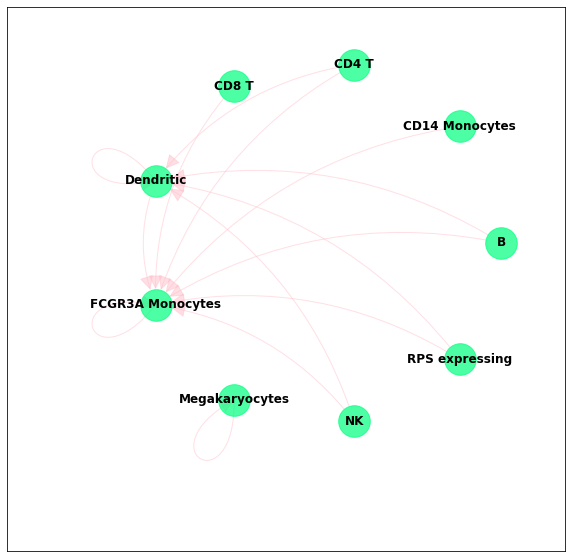

In [24]:
cellchat_launcher.visualise_interactions()

<AxesSubplot:title={'center':'Interactions counts'}>

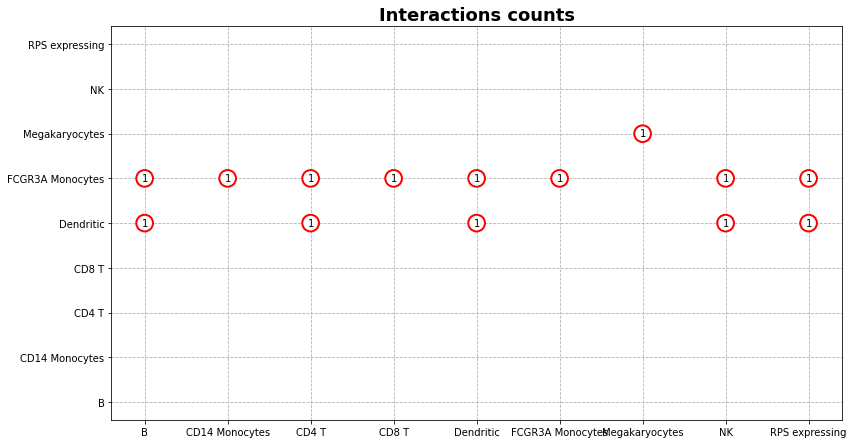

In [25]:
cellchat_launcher.dotplot_counts()

This tool makes it easier to compare tools. For example, you can clearly see, that CellChat finds less interactions between cells than CellPhoneDB